<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/anti_money_laundering_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ealtman2019_ibm_transactions_for_anti_money_laundering_aml_path = kagglehub.dataset_download('ealtman2019/ibm-transactions-for-anti-money-laundering-aml')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Small_Trans.csv
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Large_Trans.csv
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Medium_Trans.csv
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Medium_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Medium_Trans.csv
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Large_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Medium_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Large_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Large_Trans.csv
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/LI-Small_Patterns.txt
/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv


## Projeto de detecção de lavagem de dinheiro

### Impotação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path = "/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv"

### Carregando os dados brutos para analise inicial

In [ ]:
raw_df = pd.read_csv(data_path)
raw_df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [ ]:
raw_df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
std,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02
min,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00


In [ ]:
raw_df.shape

(5078345, 11)

In [ ]:
np.random.seed(42)

df = raw_df.sample(n=50000, random_state=1)

df.shape

(50000, 11)

In [ ]:
df = raw_df.sample(n=50000, random_state=1)
df.shape

(50000, 11)

In [ ]:
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4205263,2022/09/08 23:03,70,100428A08,148586,8120D5550,13204.53,Saudi Riyal,13204.53,Saudi Riyal,Cash,0
3270156,2022/09/07 00:15,1132,80C50E4A0,28,80B7644F0,329.94,Mexican Peso,329.94,Mexican Peso,Credit Card,0
2669041,2022/09/05 18:41,70,1004288E8,32814,80C1FC0D0,54497.52,Mexican Peso,54497.52,Mexican Peso,Credit Card,0
262487,2022/09/01 00:03,210,8000A4B20,226548,809D2E6E0,6370.84,Canadian Dollar,6370.84,Canadian Dollar,ACH,0
2618957,2022/09/05 16:19,21,803F9CB00,9679,804679BD0,21376.33,Yen,21376.33,Yen,Cheque,0
2626571,2022/09/05 16:32,4600,801F377A0,24811,803277950,7275.11,Euro,7275.11,Euro,Cheque,0
4171449,2022/09/08 21:39,1299,800A0F720,7548,8075DE300,433.09,Euro,433.09,Euro,ACH,0
2671595,2022/09/05 19:06,21611,8013CC3F0,5394,80476B3D0,969.76,US Dollar,969.76,US Dollar,Credit Card,0
2322282,2022/09/05 01:27,4503,806DAD3E0,15916,80FC67540,2541.09,US Dollar,2541.09,US Dollar,Credit Card,0
3201913,2022/09/06 21:58,70,100428660,1729,800DF1BC0,454.43,US Dollar,454.43,US Dollar,Cheque,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 4205263 to 1446591
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           50000 non-null  object 
 1   From Bank           50000 non-null  int64  
 2   Account             50000 non-null  object 
 3   To Bank             50000 non-null  int64  
 4   Account.1           50000 non-null  object 
 5   Amount Received     50000 non-null  float64
 6   Receiving Currency  50000 non-null  object 
 7   Amount Paid         50000 non-null  float64
 8   Payment Currency    50000 non-null  object 
 9   Payment Format      50000 non-null  object 
 10  Is Laundering       50000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.6+ MB


In [ ]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000
mean,45789.348180,65801.361760,7.315752e+06,6.878572e+06,0.001320
std,81779.524835,84153.297944,5.712867e+08,5.698323e+08,0.036308
min,1.000000,1.000000,1.000000e-06,1.000000e-06,0.000000
25%,121.000000,4259.000000,1.877275e+02,1.896300e+02,0.000000
50%,9665.000000,21568.000000,1.415590e+03,1.421805e+03,0.000000
75%,28627.000000,122332.000000,1.221886e+04,1.215227e+04,0.000000
max,356233.000000,355371.000000,1.190576e+11,1.190576e+11,1.000000


In [ ]:
df['From Bank'].value_counts()

From Bank
70        4352
12         794
10         789
1          585
15         548
          ... 
35764        1
315832       1
321151       1
324818       1
335948       1
Name: count, Length: 3429, dtype: int64

In [ ]:
df['To Bank'].value_counts()

To Bank
12        415
10        406
15        397
220       321
1         292
         ... 
313815      1
348279      1
324448      1
329285      1
310723      1
Name: count, Length: 2135, dtype: int64

In [ ]:
df[['Account', 'Account.1']].describe()

,Account,Account.1
count,50000,50000
unique,37434,44321
top,100428660,100428660
freq,1648,12


In [ ]:
df['Is Laundering'].value_counts()

Is Laundering
0    49934
1       66
Name: count, dtype: int64

In [ ]:
df.columns = df.columns.str.strip()

# Ajustando o estilo dos gráficos
sns.set(style="whitegrid")

### 1. Gráfico de Barras com Escala Logarítmica

Mostra a distribuição desbalanceada das classes. A escala logarítmica ajuda a visualizar a diferença extrema entre transações normais (classe 0) e suspeitas (classe 1).
Importância: Destaca o desbalanceamento e justifica o uso de técnicas para lidar com classes desiguais em modelos de machine learning.

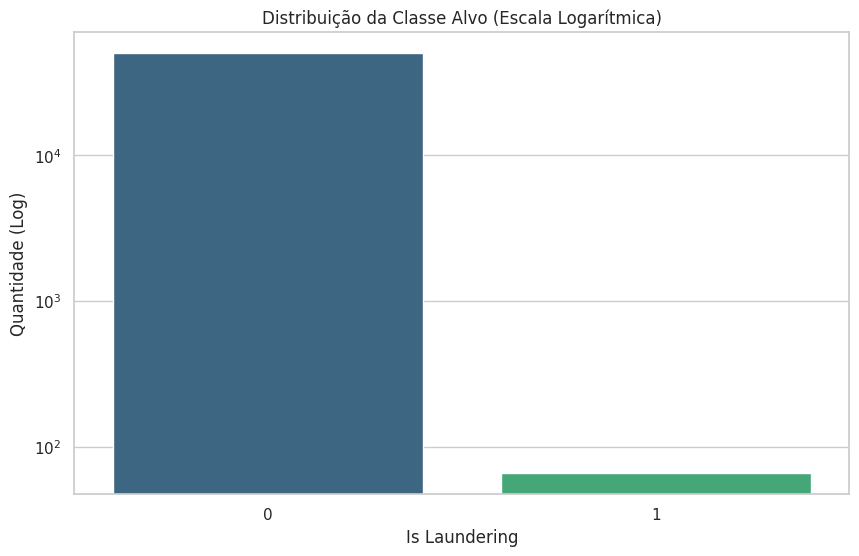

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Laundering', data=df, palette='viridis')
plt.yscale('log')
plt.title('Distribuição da Classe Alvo (Escala Logarítmica)')
plt.xlabel('Is Laundering')
plt.ylabel('Quantidade (Log)')
plt.show()

### 2. Histograma com Escala Logarítmica para Amount Received

Exibe a distribuição de "Amount Received" por classe. A escala logarítmica no eixo Y ajuda a visualizar frequências muito diferentes.
Importância: Identifica padrões de valores recebidos, ajudando a detectar comportamentos financeiros incomuns.

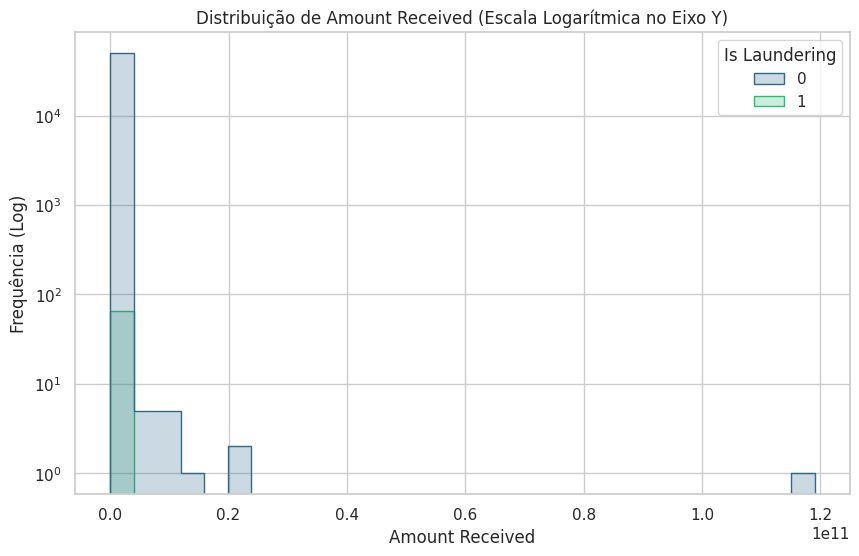

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount Received', hue='Is Laundering', log_scale=(False, True), palette='viridis', bins=30, element='step')
plt.title('Distribuição de Amount Received (Escala Logarítmica no Eixo Y)')
plt.xlabel('Amount Received')
plt.ylabel('Frequência (Log)')
plt.show()

### 3. Boxplot para Amount Received por Classe

Mostra a distribuição estatística (mediana, quartis e outliers) de "Amount Received" para cada classe.
Importância: Ajuda a identificar outliers, que podem indicar transações suspeitas.

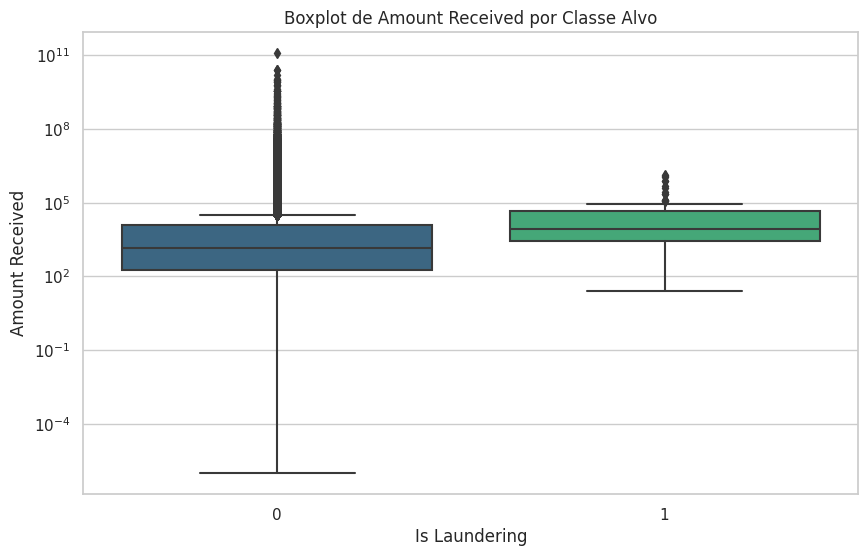

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Laundering', y='Amount Received', data=df, palette='viridis')
plt.title('Boxplot de Amount Received por Classe Alvo')
plt.xlabel('Is Laundering')
plt.ylabel('Amount Received')
plt.yscale('log')
plt.show()

### 4. Gráfico de Violino para Amount Received

Visualiza a densidade de "Amount Received" por classe, mostrando a forma da distribuição.
Importância: Revela concentrações e padrões de densidade que podem diferenciar transações normais de suspeitas.

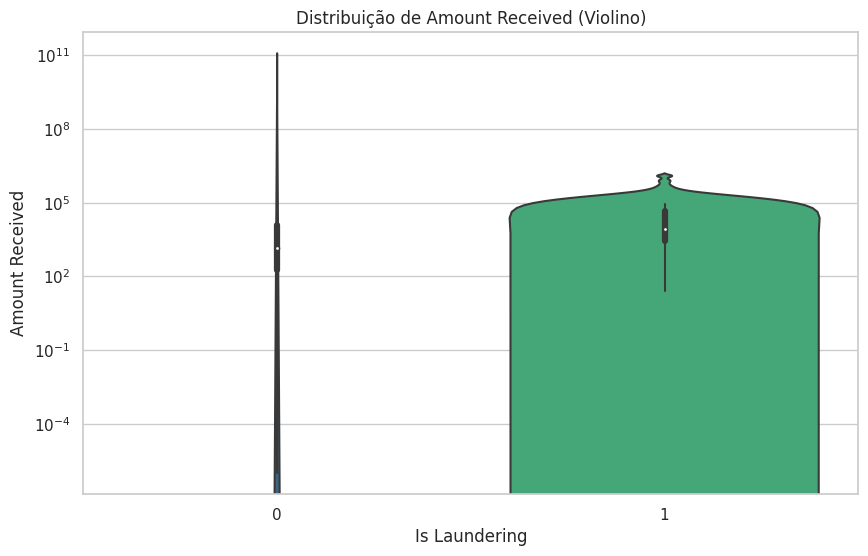

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Is Laundering', y='Amount Received', data=df, palette='viridis', scale='width')
plt.title('Distribuição de Amount Received (Violino)')
plt.xlabel('Is Laundering')
plt.ylabel('Amount Received')
plt.yscale('log')
plt.show()

### 5. Downsampled Plot

Visualiza a distribuição de "Amount Received" usando uma amostra menor da classe 0 para permitir a comparação com a classe 1.
Importância: Facilita a análise da classe minoritária, que poderia ficar escondida em gráficos com a distribuição completa.

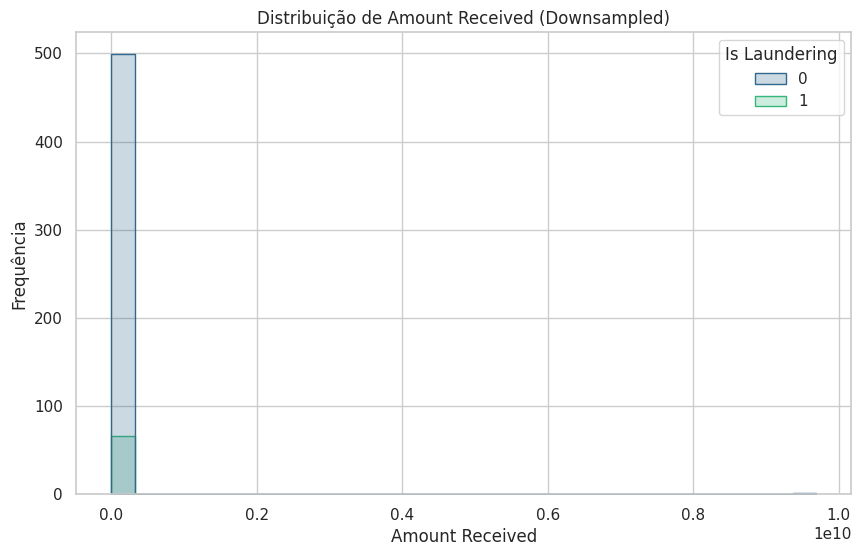

In [ ]:
sampled_df = pd.concat([
    df[df['Is Laundering'] == 0].sample(n=500, random_state=42),  # Amostra reduzida da classe 0
    df[df['Is Laundering'] == 1]  # Mantendo todos da classe 1
])
plt.figure(figsize=(10, 6))
sns.histplot(data=sampled_df, x='Amount Received', hue='Is Laundering', palette='viridis', bins=30, element='step')
plt.title('Distribuição de Amount Received (Downsampled)')
plt.xlabel('Amount Received')
plt.ylabel('Frequência')
plt.show()

### 6. Gráfico de Densidade (KDE) para Amount Received

Compara as distribuições suavizadas de "Amount Received" para cada classe.
Importância: Ajuda a verificar se há padrões distintos na classe suspeita, essenciais para criar modelos preditivos eficazes.

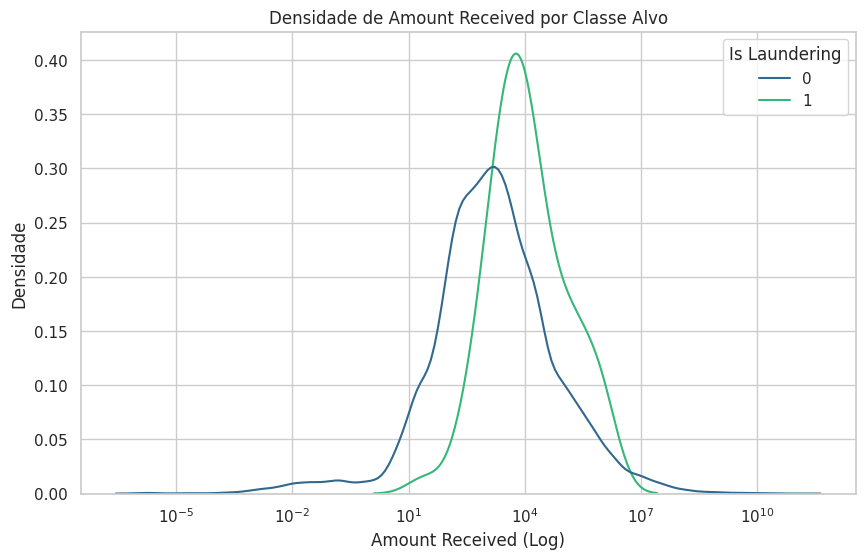

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Amount Received', hue='Is Laundering', palette='viridis', common_norm=False, log_scale=True)
plt.title('Densidade de Amount Received por Classe Alvo')
plt.xlabel('Amount Received (Log)')
plt.ylabel('Densidade')
plt.show()

### Processamento do dado

In [ ]:
cols_to_drop = ['Timestamp', 'Amount Paid', 'Payment Currency']

df.drop(cols_to_drop, axis=1, inplace=True)

df.head(5)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Payment Format,Is Laundering
4205263,70,100428A08,148586,8120D5550,13204.53,Saudi Riyal,Cash,0
3270156,1132,80C50E4A0,28,80B7644F0,329.94,Mexican Peso,Credit Card,0
2669041,70,1004288E8,32814,80C1FC0D0,54497.52,Mexican Peso,Credit Card,0
262487,210,8000A4B20,226548,809D2E6E0,6370.84,Canadian Dollar,ACH,0
2618957,21,803F9CB00,9679,804679BD0,21376.33,Yen,Cheque,0


In [ ]:
numeric_cols = df.select_dtypes(exclude="object").columns

numeric_cols

Index(['From Bank', 'To Bank', 'Amount Received', 'Is Laundering'], dtype='object')

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

categorical_cols

Index(['Account', 'Account.1', 'Receiving Currency', 'Payment Format'], dtype='object')

In [ ]:
unique_counts = df[categorical_cols].nunique()
unique_counts

Account               37434
Account.1             44321
Receiving Currency       15
Payment Format            7
dtype: int64

In [ ]:
df['Receiving Currency'].value_counts()

Receiving Currency
US Dollar            18395
Euro                 11583
Swiss Franc           2444
Yuan                  1977
Shekel                1923
UK Pound              1819
Rupee                 1804
Yen                   1578
Ruble                 1564
Bitcoin               1483
Australian Dollar     1401
Canadian Dollar       1342
Mexican Peso          1110
Saudi Riyal            860
Brazil Real            717
Name: count, dtype: int64

1. Gráfico de Barras Ordenado

Descrição: Exibe a quantidade de transações por moeda, ordenando da mais frequente para a menos frequente.
Utilidade: Destaca quais moedas são mais utilizadas, o que pode indicar preferências regionais ou comportamentos específicos associados à lavagem de dinheiro.

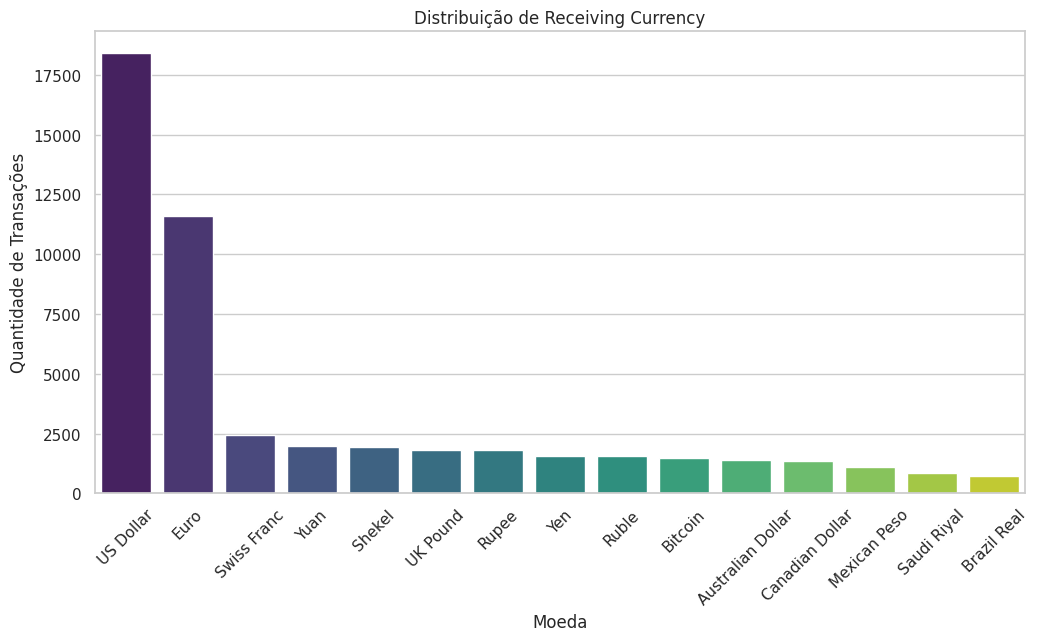

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Receiving Currency'].value_counts().index,
            y=df['Receiving Currency'].value_counts().values,
            palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribuição de Receiving Currency')
plt.xlabel('Moeda')
plt.ylabel('Quantidade de Transações')
plt.show()

2. Gráfico de Pareto

Descrição: Mostra a porcentagem acumulada de transações por moeda. Destaca as moedas que respondem pela maior parte das transações.
Utilidade: Segue o princípio de Pareto (80/20), permitindo identificar moedas prioritárias para análise de risco.

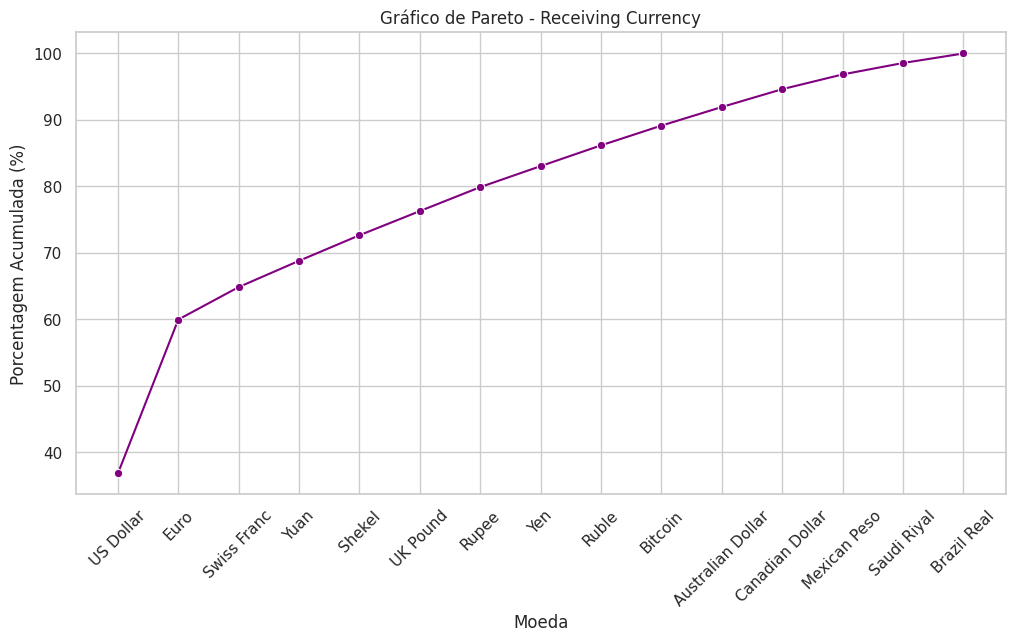

In [ ]:
pareto_data = df['Receiving Currency'].value_counts(normalize=True).cumsum() * 100
plt.figure(figsize=(12, 6))
sns.lineplot(x=pareto_data.index, y=pareto_data.values, marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Gráfico de Pareto - Receiving Currency')
plt.xlabel('Moeda')
plt.ylabel('Porcentagem Acumulada (%)')
plt.grid(True)
plt.show()

3. Boxplot de Amount Received por Receiving Currency
   
Descrição: Mostra a distribuição de "Amount Received" por moeda, destacando a mediana, a amplitude interquartil e outliers.
Utilidade:

Compara padrões de valor recebido para cada moeda.
Identifica moedas com transações mais altas ou comportamentos atípicos, ajudando na detecção de anomalias.
Revela se determinadas moedas têm maior variação em valores recebidos, o que pode indicar atividades suspeitas.

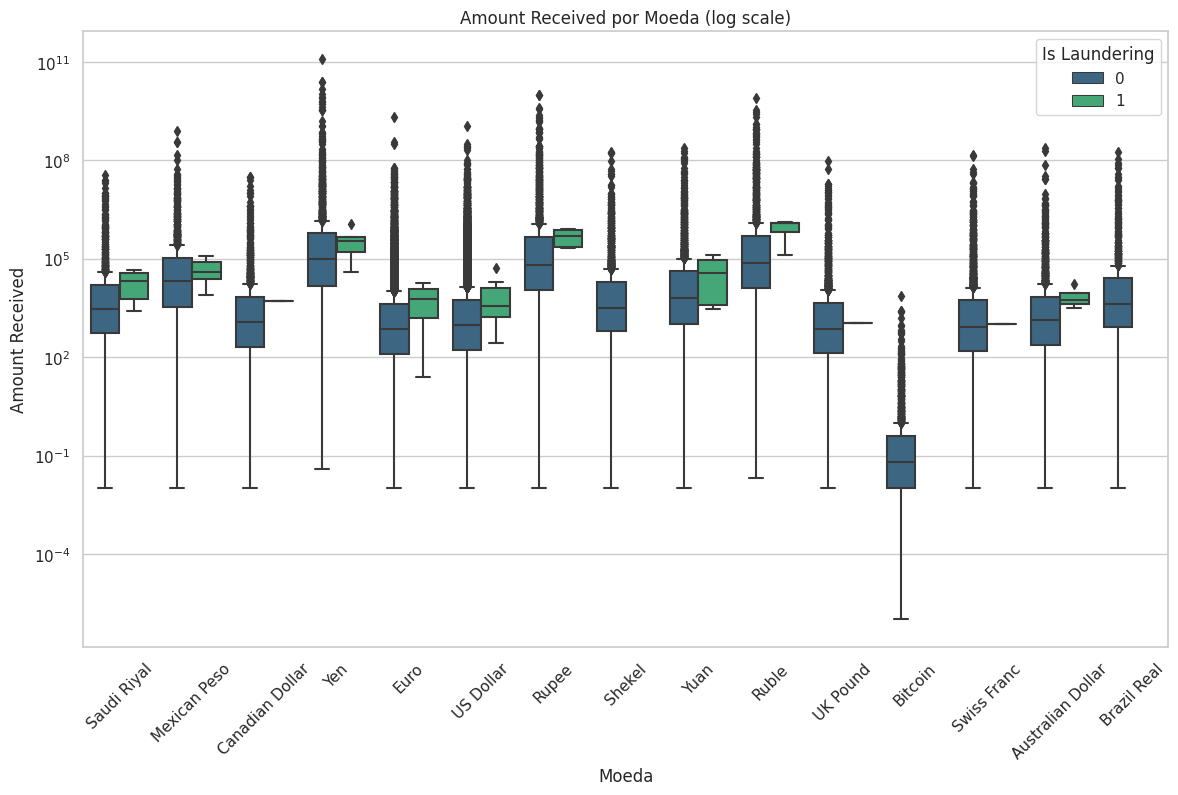

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Receiving Currency', y='Amount Received', hue='Is Laundering', data=df, palette='viridis')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Amount Received por Moeda (log scale)')
plt.xlabel('Moeda')
plt.ylabel('Amount Received')
plt.legend(title='Is Laundering')
plt.show()

In [ ]:
df.isnull().sum()

From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Payment Format        0
Is Laundering         0
dtype: int64

In [ ]:
X = df.drop(columns=["Is Laundering"], axis=1)
y = df["Is Laundering"]

In [ ]:
numerical_features = X.select_dtypes(exclude="object").columns

numerical_features

Index(['From Bank', 'To Bank', 'Amount Received'], dtype='object')

In [ ]:
categorical_features = X.select_dtypes(include="object").columns

categorical_features

Index(['Account', 'Account.1', 'Receiving Currency', 'Payment Format'], dtype='object')

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
    ]
)

In [ ]:
transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((40000, 7), (10000, 7))

### Treinando modelo base

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [ ]:
param_grid = {
    'max_depth': [4,8,16],
    'eta': [0.1,0.2,0.3],
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.2s
[CV] END ...............................eta=0.1, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=8; total time=   0.1s
[CV] END ...............................eta=0.1, max_depth=8; total time=   0.1s
[CV] END ..............................eta=0.1, max_depth=16; total time=   0.1s
[CV] END ..............................eta=0.1, max_depth=16; total time=   0.1s
[CV] END ...............................eta=0.2, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.2, max_depth=4; total time=   0.1s
[CV] END ...............................eta=0.2, max_depth=8; total time=   0.1s
[CV] END ...............................eta=0.2, max_depth=8; total time=   0.1s
[CV] END ..............................eta=0.2, max_depth=16; total time=   0.1s
[CV] END ..............................eta=0.2, m

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'eta': [0.1, 0.2, 0.3], 'max_depth': [4, 8, 16]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print("Test AUC: ", test_auc)

Test AUC:  0.9215938027524249


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

test_probabilities = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
test_auc

0.9215938027524249

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

print(fpr, tpr, thresholds)

[0.00000000e+00 1.00140196e-04 6.20869217e-03 ... 9.99399159e-01
 9.99899860e-01 1.00000000e+00] [0. 0. 0. ... 1. 1. 1.] [1.9664998e+00 9.6649987e-01 2.2017653e-01 ... 1.9057014e-05 1.8948336e-05
 1.8251982e-05]


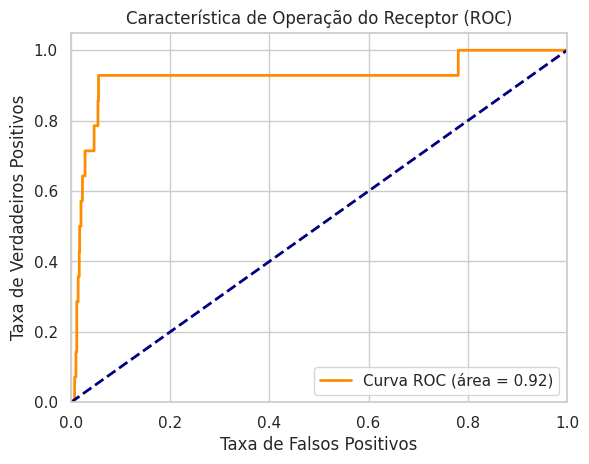

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

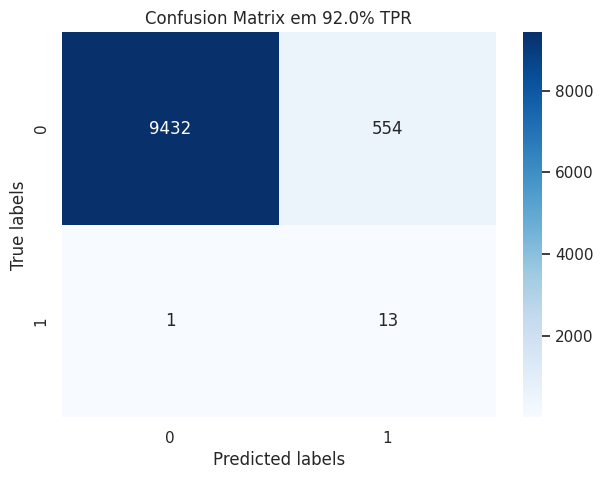

Taxa de Falsos Positivos (FPR): 0.055
Taxa de Verdadeiros Positivos (TPR): 0.929


In [ ]:
desired_tpr = 0.92
closest_threshold = thresholds[np.argmin(np.abs(tpr - desired_tpr))]

y_pred = (test_probabilities >= closest_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix em {desired_tpr*100}% TPR')
plt.show()

tn, fp, fn, tp = cm.ravel()
fpr_cm = fp / (fp + tn)
tpr_cm = tp / (tp + fn)

print(f"Taxa de Falsos Positivos (FPR): {fpr_cm:.3f}")
print(f"Taxa de Verdadeiros Positivos (TPR): {tpr_cm:.3f}")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9986
           1       0.02      0.93      0.04        14

    accuracy                           0.94     10000
   macro avg       0.51      0.94      0.51     10000
weighted avg       1.00      0.94      0.97     10000



### Lidando com dados desbalanceados usando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
counter

Counter({0: 39948, 1: 52})

In [ ]:
for k, v in counter.items():
    per = 100*v/len(y_train)
    print(f"Classe= {k}, n={v} ({per:.2f}%)")

Classe= 0, n=39948 (99.87%)
Classe= 1, n=52 (0.13%)


In [ ]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train_os)

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Classe= {k}, n={v} ({per:.2f}%)")

Classe= 0, n=39948 (99.87%)
Classe= 1, n=39948 (99.87%)


In [ ]:
print(X_train_os.shape, y_train_os.shape)

(79896, 7) (79896,)


In [ ]:
from collections import Counter

class_distribution = Counter(y_train_os)
for class_label, count in class_distribution.items():
    print(f"Classe {class_label}: {count} amostras")

Classe 0: 39948 amostras
Classe 1: 39948 amostras


In [ ]:
is_balanced = all(count == class_distribution[y_train_os[0]] for count in class_distribution.values())

if is_balanced:
    print("A variável alvo y está balanceada")
else:
    print("A variável alvo y não está balanceada")

A variável alvo y está balanceada


### Treinamento de Modelos de Classificação com Balanceamento de Dados

In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Divide os dados em conjuntos de treino e teste.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_pipelines():
    """
    Cria pipelines para os classificadores XGBoost, RandomForest e ExtraTrees.
    """
    return {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

def evaluate_model(pipeline, X, y):
    """
    Avalia o modelo em um conjunto de dados específico.

    :param pipeline: Pipeline do modelo a ser avaliado
    :param X: Dados de entrada
    :param y: Variável alvo
    :return: Dicionário com métricas de avaliação
    """
    y_pred = pipeline.predict(X)
    precision = round(precision_score(y, y_pred, average="weighted") * 100, 1)
    recall = round(recall_score(y, y_pred, average="weighted") * 100, 1)
    f1 = round(f1_score(y, y_pred, average="weighted") * 100, 1)
    conf_matrix = confusion_matrix(y, y_pred)
    classification_rep = classification_report(y, y_pred, output_dict=True)

    return {
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_rep
    }

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Ajusta modelos de classificação usando XGBoost, RandomForest e ExtraTrees classifiers.
    """
    X_train, X_test, y_train, y_test = split_data(X, y, test_size, random_state)
    pipelines = create_pipelines()
    results = {}

    for classifier_name, pipeline in pipelines.items():
        print(f"Ajustando e avaliando o classificador: {classifier_name}")
        pipeline.fit(X_train, y_train)

        print("Resultados de Treino:")
        train_results = evaluate_model(pipeline, X_train, y_train)
        print(f"Precisão: {train_results['precision']}%")
        print(f"Recall: {train_results['recall']}%")
        print(f"F1-Score: {train_results['f1-score']}%")

        print("\nResultados de Teste:")
        test_results = evaluate_model(pipeline, X_test, y_test)
        print(f"Precisão: {test_results['precision']}%")
        print(f"Recall: {test_results['recall']}%")
        print(f"F1-Score: {test_results['f1-score']}%")
        print("\n")

        results[classifier_name] = {
            'training': train_results,
            'testing': test_results
        }

    return results

Ajustando e avaliando o classificador: XGBoost
Resultados de Treino:
Precisão: 100.0%
Recall: 100.0%
F1-Score: 100.0%

Resultados de Teste:
Precisão: 99.8%
Recall: 99.8%
F1-Score: 99.8%


Ajustando e avaliando o classificador: Random Forest
Resultados de Treino:
Precisão: 100.0%
Recall: 100.0%
F1-Score: 100.0%

Resultados de Teste:
Precisão: 99.9%
Recall: 99.9%
F1-Score: 99.9%


Ajustando e avaliando o classificador: ExtraTreesClassifier
Resultados de Treino:
Precisão: 100.0%
Recall: 100.0%
F1-Score: 100.0%

Resultados de Teste:
Precisão: 99.9%
Recall: 99.9%
F1-Score: 99.9%


Algoritmo: XGBoost
    Métrica  Treinamento  Teste
0  Precisão        100.0   99.8
1    Recall        100.0   99.8
2  F1-score        100.0   99.8




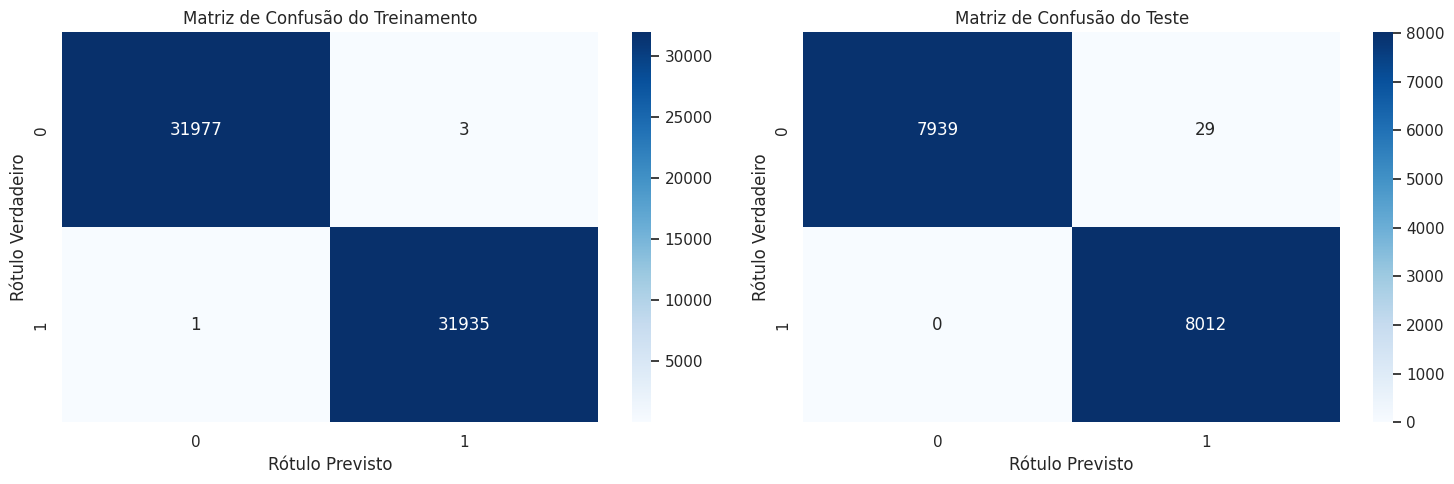

Algoritmo: Random Forest
    Métrica  Treinamento  Teste
0  Precisão        100.0   99.9
1    Recall        100.0   99.9
2  F1-score        100.0   99.9




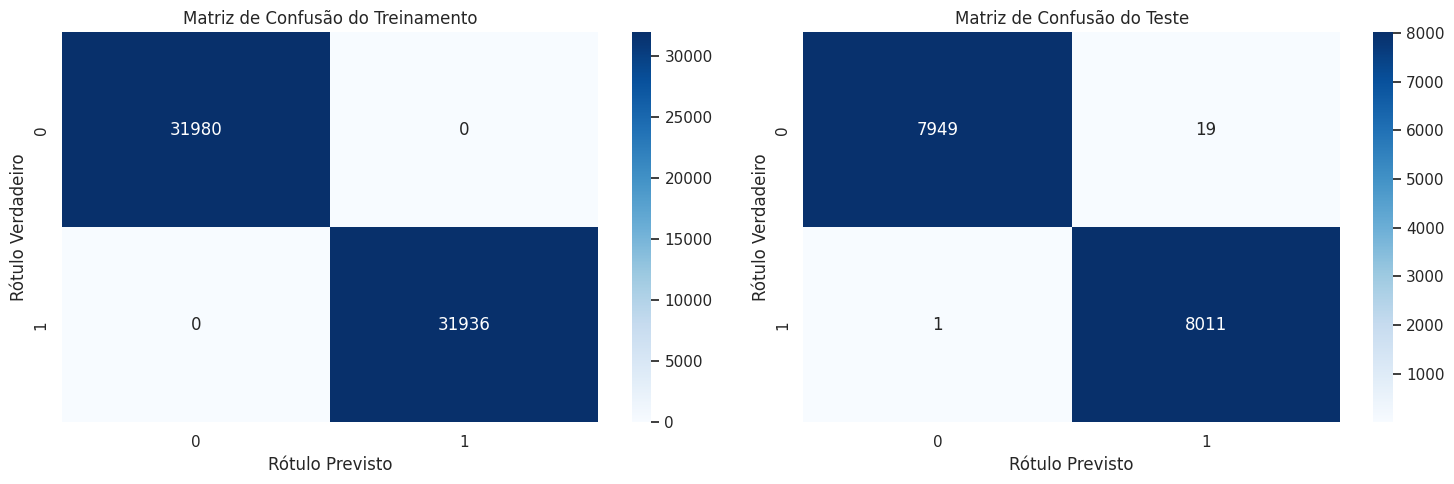

Algoritmo: ExtraTreesClassifier
    Métrica  Treinamento  Teste
0  Precisão        100.0   99.9
1    Recall        100.0   99.9
2  F1-score        100.0   99.9




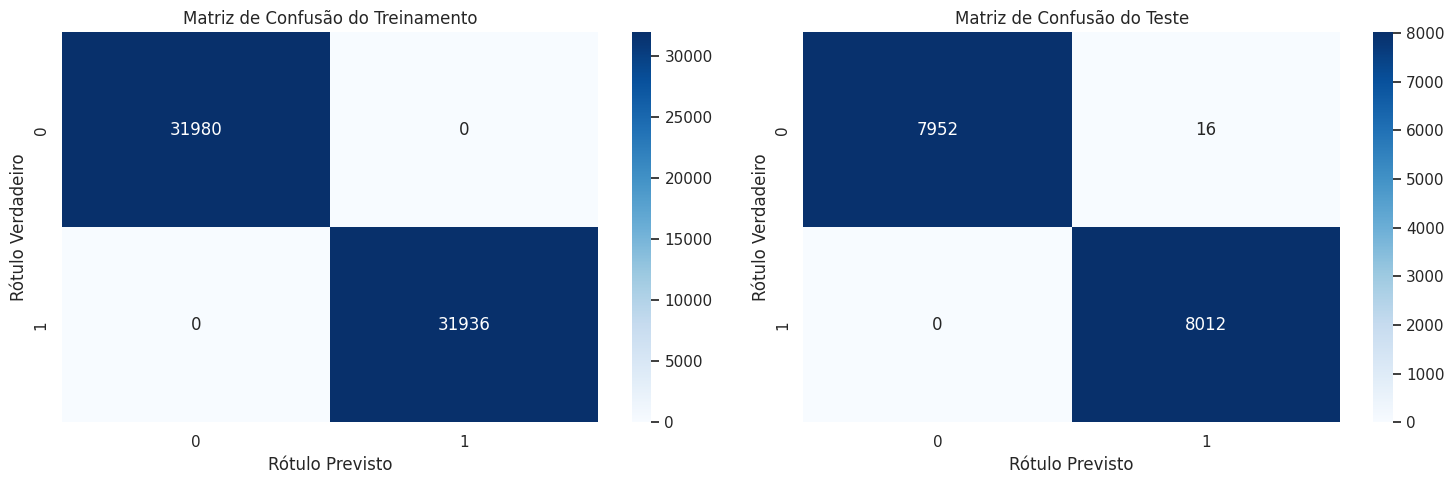

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = fit_classification_models(X_train_os, y_train_os)

for classifier_name, metrics in results.items():
    print(f"Algoritmo: {classifier_name}")

    # Mostrando DataFrame
    df = pd.DataFrame({
        'Métrica': ['Precisão', 'Recall', 'F1-score'],
        'Treinamento': [metrics['training']['precision'], metrics['training']['recall'], metrics['training']['f1-score']],
        'Teste': [metrics['testing']['precision'], metrics['testing']['recall'], metrics['testing']['f1-score']]
    })
    print(df)
    print("\n")

    # Plote das confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Training confusion matrix
    sns.heatmap(metrics['training']['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Matriz de Confusão do Treinamento')
    axes[0].set_xlabel('Rótulo Previsto')
    axes[0].set_ylabel('Rótulo Verdadeiro')

    # Testing confusion matrix
    sns.heatmap(metrics['testing']['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('Matriz de Confusão do Teste')
    axes[1].set_xlabel('Rótulo Previsto')
    axes[1].set_ylabel('Rótulo Verdadeiro')

    plt.tight_layout()
    plt.show()

In [ ]:
all_scores = []

for classifier_name, metrics in results.items():

    all_scores.append({
        'Algoritmo': classifier_name,
        'Precisão de Treinamento': metrics['training']['precision'],
        'Precisão de Teste': metrics['testing']['precision'],
        'Recall de Treinamento': metrics['training']['recall'],
        'Recall de Teste': metrics['testing']['recall'],
        'F1-score de Treinamento': metrics['training']['f1-score'],
        'F1-score de Teste': metrics['testing']['f1-score']
    })

In [ ]:
scores_df = pd.DataFrame(all_scores)
scores_sorted = scores_df.sort_values(by='F1-score de Teste', ascending=False)
scores_sorted

,Algoritmo,Precisão de Treinamento,Precisão de Teste,Recall de Treinamento,Recall de Teste,F1-score de Treinamento,F1-score de Teste
1,Random Forest,100.0,99.9,100.0,99.9,100.0,99.9
2,ExtraTreesClassifier,100.0,99.9,100.0,99.9,100.0,99.9
0,XGBoost,100.0,99.8,100.0,99.8,100.0,99.8
